# Visualization of Decision Trees

From the blog post [Visualize a Decision Tree in 4 Ways with Scikit-Learn and Python](https://mljar.com/blog/visualize-decision-tree/) by Piotr Płoński 

[Decision Trees](https://en.wikipedia.org/wiki/Decision_tree_learning) are a fundamental and versatile machine learning algorithm that plays a pivotal role in classification and regression tasks. They provide a graphical representation of decision-making processes, making them highly interpretable and user-friendly. Decision trees break down complex decision problems into a series of sequential, binary choices, ultimately leading to a prediction or decision. With their ability to handle both categorical and numerical data, decision trees are widely used in various domains, including healthcare, finance, and natural language processing, offering a powerful tool for both beginners and experts in the field of machine learning. 

This notebook presents 4 ways to visualize Decision Trees in Python:

- print text representation of the tree with `sklearn.tree.export_text` method
- plot with `sklearn.tree.plot_tree method` (`matplotlib` needed)
- plot with `sklearn.tree.export_graphviz` method (`graphviz` needed)
- plot with `dtreeviz` package (`dtreeviz` and `graphviz` needed)



## Install required packages

## Train a simple Decision Tree

In [1]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

Use the [Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) to train a simple Decision Tree model.
Because this example is for demonstration only, you can use the entire dataset for training.

In [2]:
# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

## Print Text Representation

Exporting Decision Tree to the text representation can be useful when working on applications whitout user interface or when we want to log information about the model into the text file. You can check details about export_text in the [scikit-learn docs](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html#sklearn.tree.export_text).

In [3]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



Save the output to a file with the following code

In [4]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

## Plot Tree with `plot_tree`

The `plot_tree` method requires `matplotlib` to be installed. It allows us to easily produce figure of the tree (without intermediate exporting to graphviz) The more information about `plot_tree` arguments are in the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html).

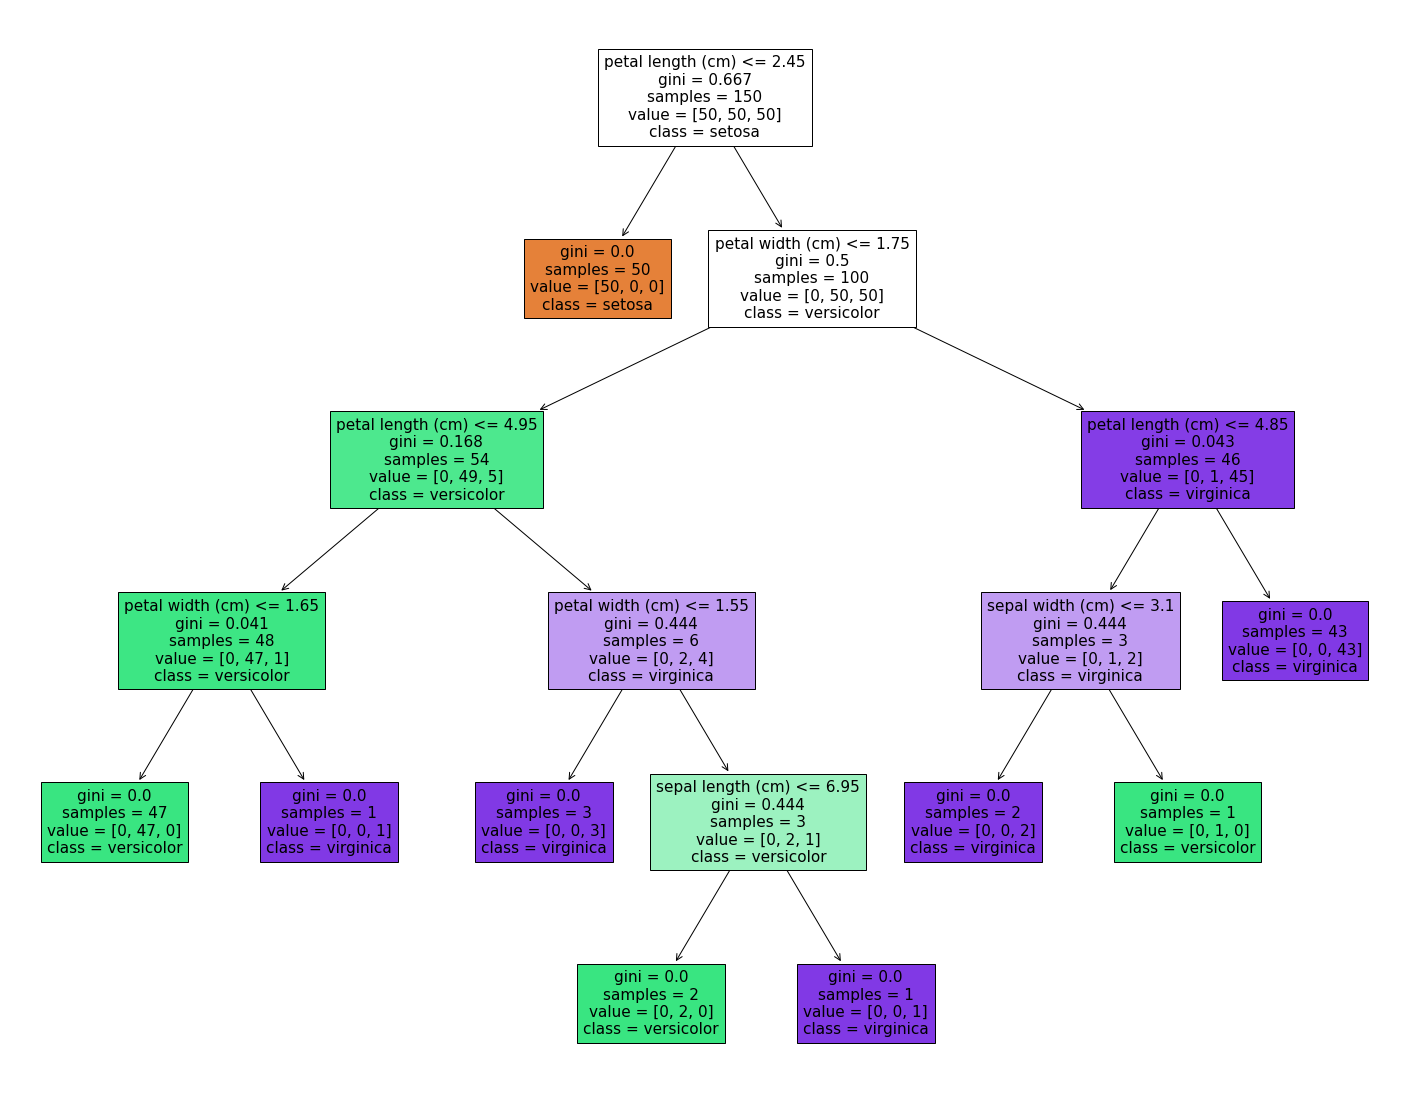

In [5]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

To save the figure to the `.png` file:

In [6]:
fig.savefig("decistion_tree.png")

## Visualize Decision Tree with `graphviz`

You first export the decision tree structure to [DOT format](https://en.wikipedia.org/wiki/DOT_(graph_description_language)) with `export_graphviz` method (link to [docs](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html)). Then plot it in the notebook or save to the file.

In [7]:
import os
os.popen("dot -version < /dev/null").readlines()

[]

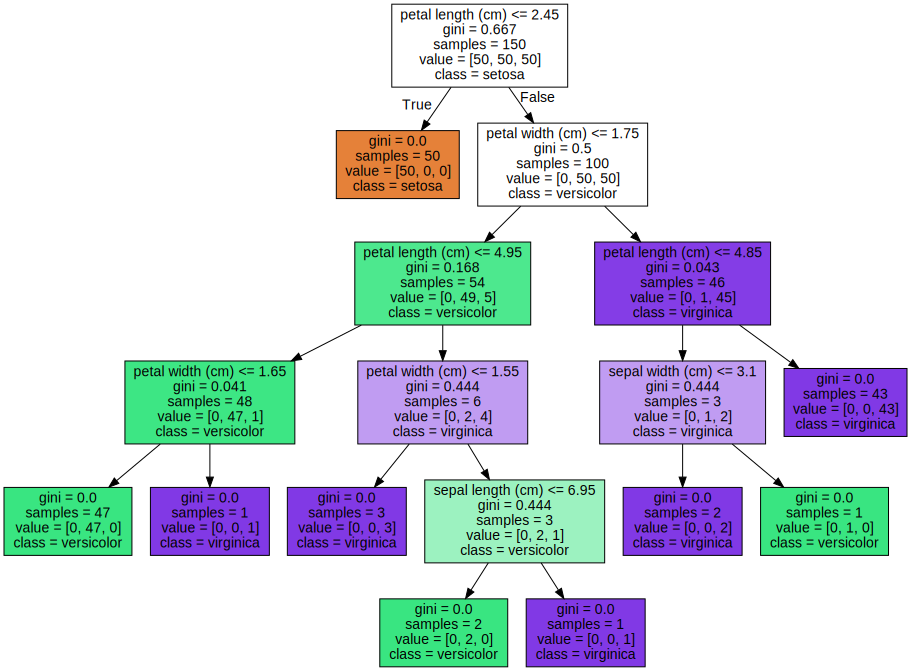

In [8]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

# with open("decistion_tree.dot", "w", encoding='utf-8') as fout:
#     fout.write(f"{dot_data}\n")

In [9]:
! dot -T png decistion_tree.dot > decistion_tree2.png

## Plot Decision Tree with `dtreeviz` Package

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


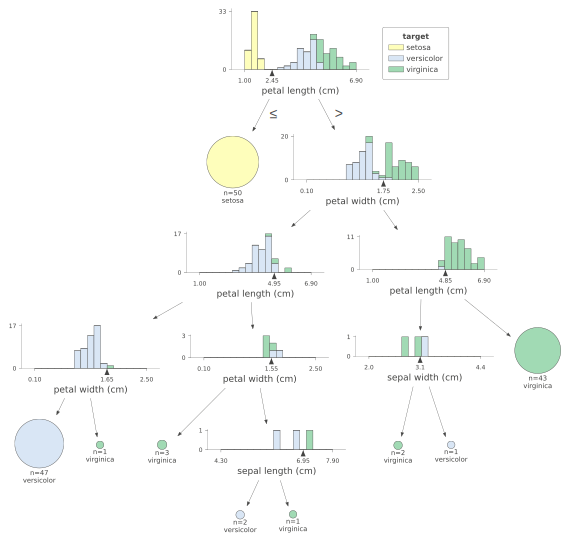

In [10]:
import dtreeviz


viz = dtreeviz.model(clf, X, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))

viz.view()